<a href="https://colab.research.google.com/github/shaanvithabandewar/data_science_assignmets/blob/main/project_sentiment_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP Sentiment and classification analysis:

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/amazon_reviews.csv')

# View the first few rows
print(df.head())

   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0    

In [ ]:
# Check dataset structure
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB
None


In [ ]:
# Check for missing values
print(df.isnull().sum())



Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


In [ ]:
# Get basic statistics on numeric fields
print(df.describe())



        Unnamed: 0      overall     day_diff  helpful_yes   helpful_no  \
count  4915.000000  4915.000000  4915.000000  4915.000000  4915.000000   
mean   2457.000000     4.587589   437.367040     1.311089     0.210376   
std    1418.982617     0.996845   209.439871    41.619161     4.023296   
min       0.000000     1.000000     1.000000     0.000000     0.000000   
25%    1228.500000     5.000000   281.000000     0.000000     0.000000   
50%    2457.000000     5.000000   431.000000     0.000000     0.000000   
75%    3685.500000     5.000000   601.000000     0.000000     0.000000   
max    4914.000000     5.000000  1064.000000  1952.000000   183.000000   

        total_vote  score_pos_neg_diff  score_average_rating  \
count  4915.000000         4915.000000           4915.000000   
mean      1.521465            1.100712              0.075468   
std      44.123095           39.367949              0.256062   
min       0.000000         -130.000000              0.000000   
25%       0.0

In [ ]:
# Check column names
print(df.columns)



Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')


In [ ]:
# View a random sample of reviews
print(df.sample(5))

      Unnamed: 0     reviewerName  overall  \
3837        3837             Rich      5.0   
3305        3305             Mo-z      4.0   
1670        1670  Francisco Anaya      4.0   
3318        3318          Mr. Dip      5.0   
4612        4612             Tony      1.0   

                                             reviewText  reviewTime  day_diff  \
3837  I bought this memory card for my galaxy note 2...  2013-05-31       556   
3305  I believe that this was a good price for this ...  2014-01-25       317   
1670  Comore esta memorka para completar mi nueva sa...  2013-02-01       675   
3318  I tried this both on Android tablets and the M...  2013-03-23       625   
4612  This may be the worst memory card I've ever pu...  2014-06-15       176   

      helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
3837            1           0           1                   1   
3305            0           0           0                   0   
1670            0           0           0

In [ ]:
# Drop rows with missing review text
df = df.dropna(subset=['reviewerName'])

# Remove duplicates
df = df.drop_duplicates()

# Preview cleaned data
print(df.head())


   Unnamed: 0  reviewerName  overall  \
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   
5           5       2Cents!      5.0   

                                          reviewText  reviewTime  day_diff  \
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   
5  It's mini storage.  It doesn't do anything els...  2013-04-29       588   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0                   0   
4            0           0           0    

In [ ]:

# Drop rows with missing review text
df = df.dropna(subset=['reviewText'])

# Remove duplicates
df = df.drop_duplicates()

# Preview cleaned data
print(df.head())

   Unnamed: 0  reviewerName  overall  \
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   
5           5       2Cents!      5.0   

                                          reviewText  reviewTime  day_diff  \
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   
5  It's mini storage.  It doesn't do anything els...  2013-04-29       588   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0                   0   
4            0           0           0    

In [ ]:
print(df.columns)



Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')


In [ ]:
# Rename the unnamed columns
df = df.rename(columns={'Unnamed: 0': 'Sno'})


In [ ]:
print(df.columns)

Index(['Sno', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')


In [ ]:
df_cleaned = df.dropna()

# Check the result
print(df_cleaned)

       Sno  reviewerName  overall  \
1        1          0mie      5.0   
2        2           1K3      4.0   
3        3           1m2      5.0   
4        4  2&amp;1/2Men      5.0   
5        5       2Cents!      5.0   
...    ...           ...      ...   
4910  4910        ZM "J"      1.0   
4911  4911            Zo      5.0   
4912  4912     Z S Liske      5.0   
4913  4913      Z Taylor      5.0   
4914  4914           Zza      5.0   

                                             reviewText  reviewTime  day_diff  \
1     Purchased this for my device, it worked as adv...  2013-10-25       409   
2     it works as expected. I should have sprung for...  2012-12-23       715   
3     This think has worked out great.Had a diff. br...  2013-11-21       382   
4     Bought it with Retail Packaging, arrived legit...  2013-07-13       513   
5     It's mini storage.  It doesn't do anything els...  2013-04-29       588   
...                                                 ...         ...  

In [ ]:
import re

# Function to clean the review text
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the review text column
df['cleaned_review'] = df['reviewText'].apply(clean_text)


In [ ]:
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK resources
nltk.download('punkt')

# Tokenize the review text
df['tokenized_review'] = df['cleaned_review'].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords from the tokenized review
df['review_no_stopwords'] = df['tokenized_review'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize words
df['lemmatized_review'] = df['review_no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


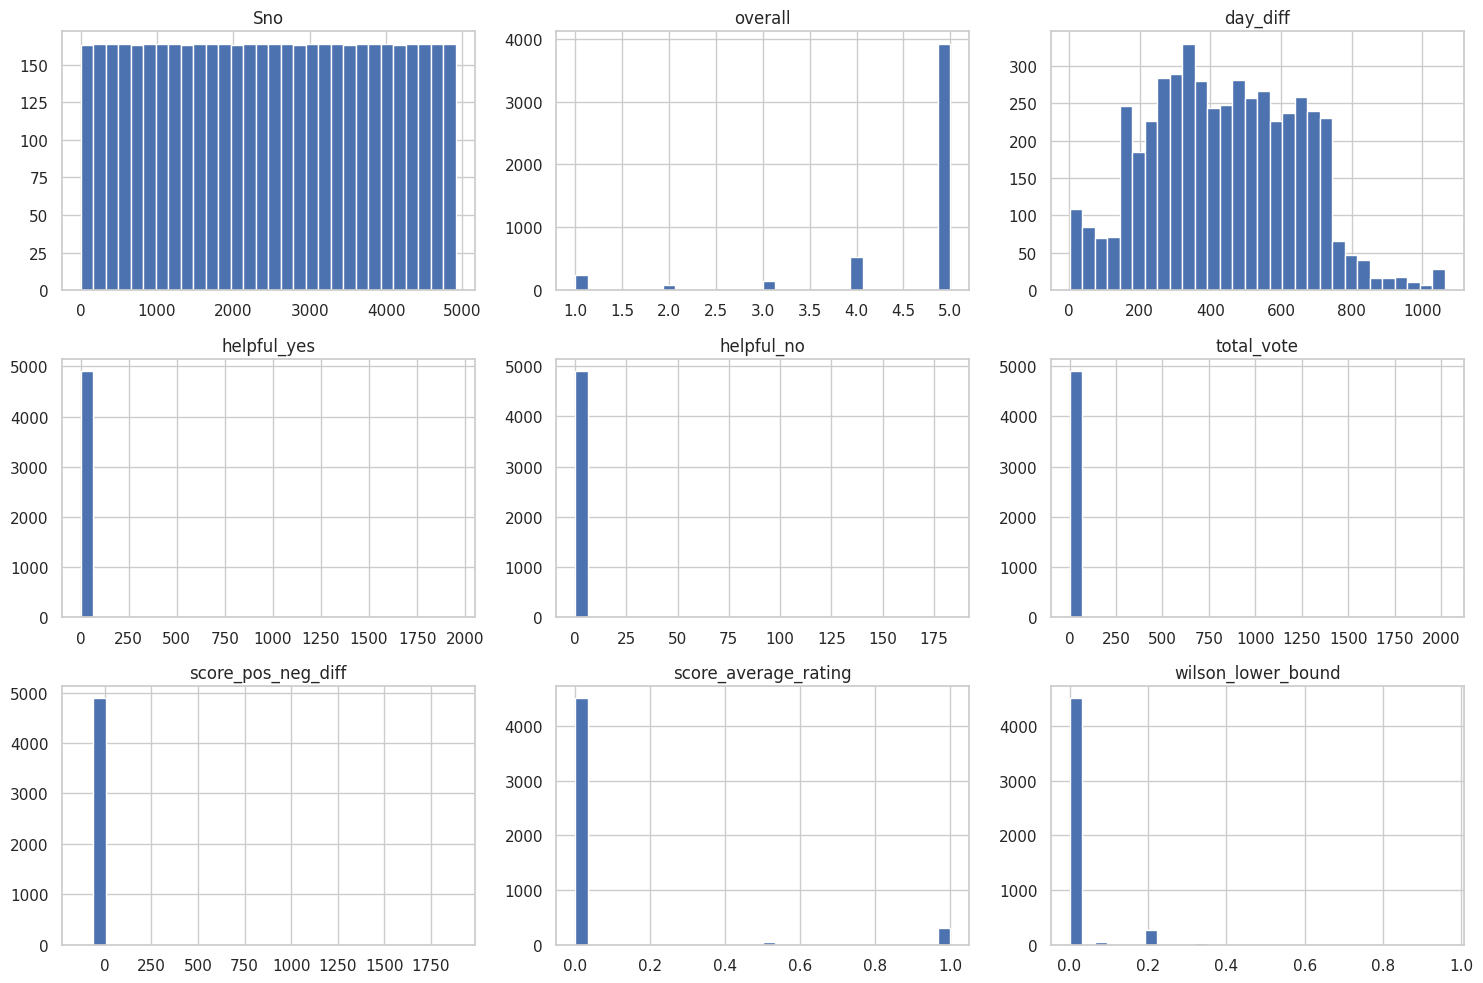

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Histogram for numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [ ]:
def sentiment_label(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

# Create a new column for sentiment labels
df['sentiment'] = df['overall'].apply(sentiment_label)



In [ ]:
print(df.sentiment)

1       Positive
2       Positive
3       Positive
4       Positive
5       Positive
          ...   
4910    Negative
4911    Positive
4912    Positive
4913    Positive
4914    Positive
Name: sentiment, Length: 4913, dtype: object


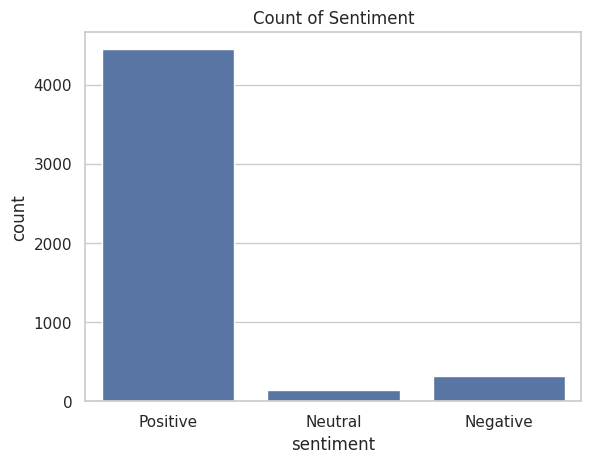

In [ ]:
# Count plot for a categorical column (e.g., 'sentiment')
sns.countplot(data=df, x='sentiment')
plt.title('Count of Sentiment')
plt.show()


In [ ]:
# Drop the reviewer name column
df = df.drop(columns=['reviewerName'])

# Check the updated DataFrame
print(df.head())


   Sno  overall                                         reviewText  \
1    1      5.0  Purchased this for my device, it worked as adv...   
2    2      4.0  it works as expected. I should have sprung for...   
3    3      5.0  This think has worked out great.Had a diff. br...   
4    4      5.0  Bought it with Retail Packaging, arrived legit...   
5    5      5.0  It's mini storage.  It doesn't do anything els...   

   reviewTime  day_diff  helpful_yes  helpful_no  total_vote  \
1  2013-10-25       409            0           0           0   
2  2012-12-23       715            0           0           0   
3  2013-11-21       382            0           0           0   
4  2013-07-13       513            0           0           0   
5  2013-04-29       588            0           0           0   

   score_pos_neg_diff  score_average_rating  wilson_lower_bound  \
1                   0                   0.0                 0.0   
2                   0                   0.0                 

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


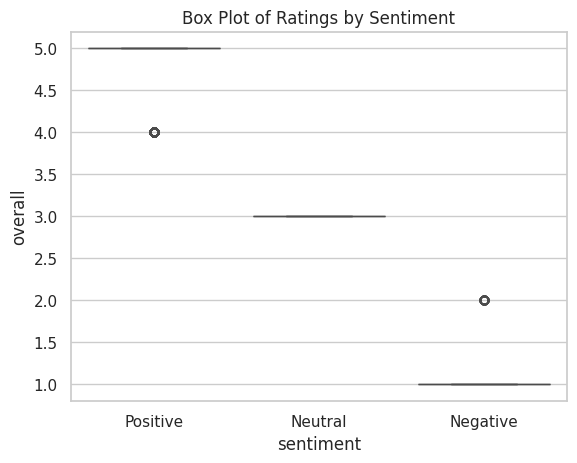

In [ ]:
# Box plot to analyze ratings by sentiment
sns.boxplot(data=df, x='sentiment', y='overall')
plt.title('Box Plot of Ratings by Sentiment')
plt.show()


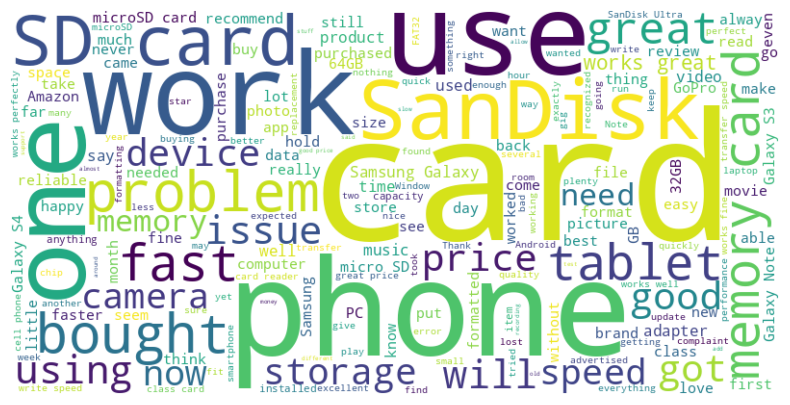

In [ ]:
from wordcloud import WordCloud

# Combine all reviews into one string
text = ' '.join(df['reviewText'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


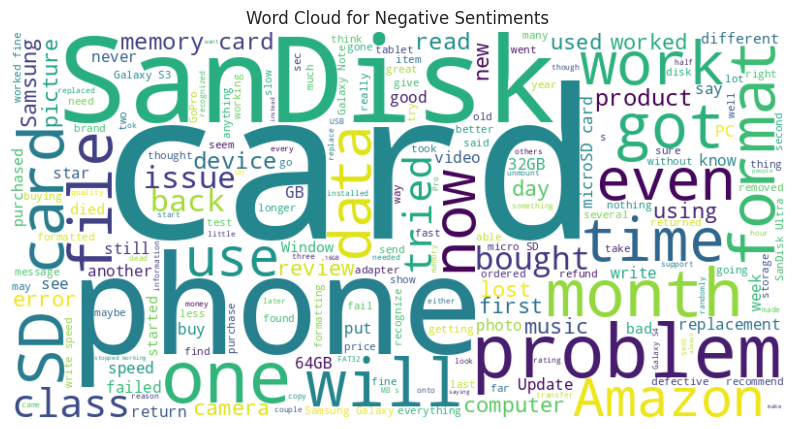

In [ ]:
# Generate word cloud for Negative sentiment
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['reviewText'])  # Replace with your actual column names
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()


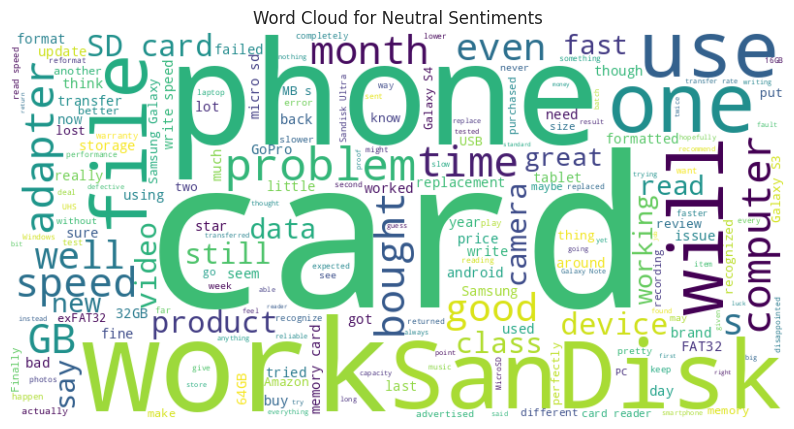

In [ ]:
# Generate word cloud for Neutral sentiment
neutral_text = ' '.join(df[df['sentiment'] == 'Neutral']['reviewText'])  # Replace with your actual column names
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(10, 6))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiments')
plt.show()


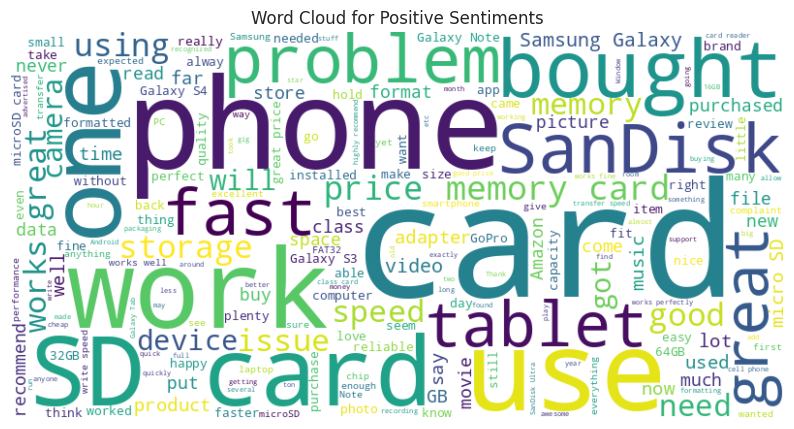

In [ ]:
# Generate word cloud for Positive sentiment
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['reviewText'])  # Replace with your actual column names
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import re
def get_most_common_words(text_series, n=10):
    # Combine all texts into one string
    all_text = ' '.join(text_series)

    # Remove punctuation and make everything lowercase
    all_text = re.sub(r'[^\w\s]', '', all_text.lower())

    # Split into words
    words = all_text.split()

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words
    return word_counts.most_common(n)



In [ ]:

# Most repeated words for Negative sentiment
negative_common_words = get_most_common_words(df[df['sentiment'] == 'Negative']['reviewText'], n=10)
print("Most Common Words in Negative Sentiments:")
print(negative_common_words)

Most Common Words in Negative Sentiments:
[('the', 1462), ('i', 1247), ('it', 971), ('and', 899), ('to', 846), ('card', 821), ('a', 815), ('my', 535), ('this', 522), ('of', 470)]


In [ ]:
# Most repeated words for Neutral sentiment
neutral_common_words = get_most_common_words(df[df['sentiment'] == 'Neutral']['reviewText'], n=10)
print("Most Common Words in Neutral Sentiments:")
print(neutral_common_words)

Most Common Words in Neutral Sentiments:
[('the', 470), ('i', 350), ('it', 333), ('and', 279), ('to', 264), ('a', 261), ('card', 226), ('my', 170), ('this', 144), ('of', 128)]


In [ ]:
# Most repeated words for Positive sentiment
positive_common_words = get_most_common_words(df[df['sentiment'] == 'Positive']['reviewText'], n=10)
print("Most Common Words in Positive Sentiments:")
print(positive_common_words)

Most Common Words in Positive Sentiments:
[('the', 7145), ('i', 6499), ('and', 6407), ('it', 5532), ('to', 5025), ('a', 4504), ('my', 4343), ('this', 3824), ('for', 3563), ('card', 3544)]


In [ ]:
# Step 5: Visualize the Most Common Words (Optional)
def plot_most_common_words(common_words, title):
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.show()


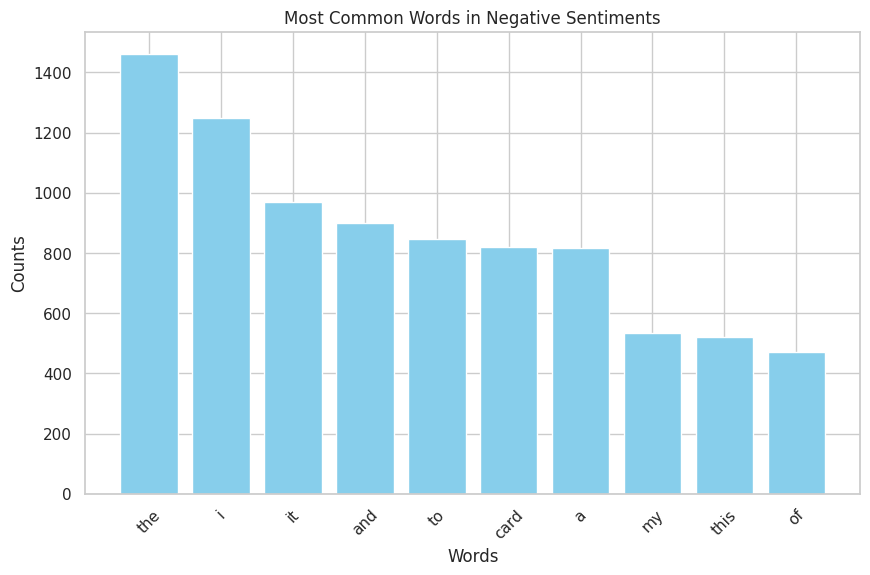

In [ ]:
# Plot for Negative Sentiment
plot_most_common_words(negative_common_words, "Most Common Words in Negative Sentiments")


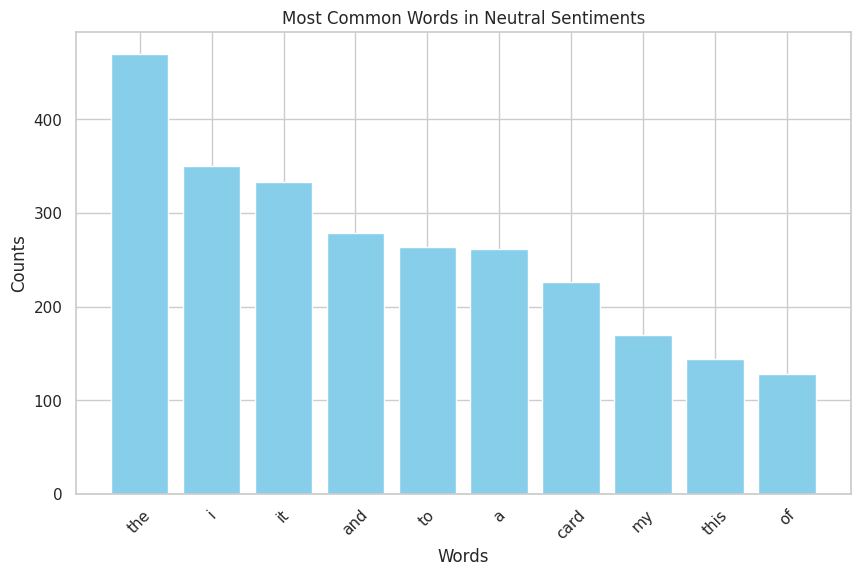

In [ ]:
# Plot for Neutral Sentiment
plot_most_common_words(neutral_common_words, "Most Common Words in Neutral Sentiments")

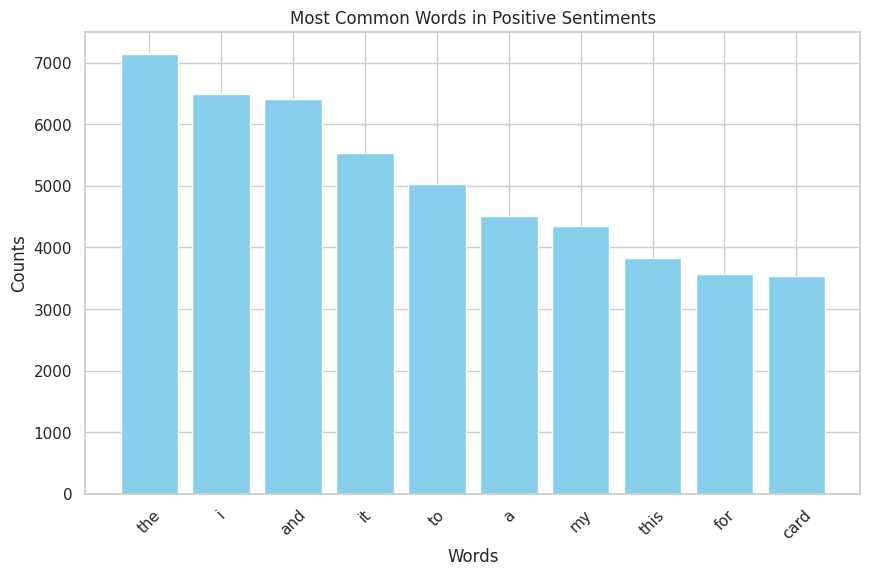

In [ ]:
# Plot for Positive Sentiment
plot_most_common_words(positive_common_words, "Most Common Words in Positive Sentiments")

Word Count Distribution
Description: A histogram to show the distribution of the number of words in reviews.

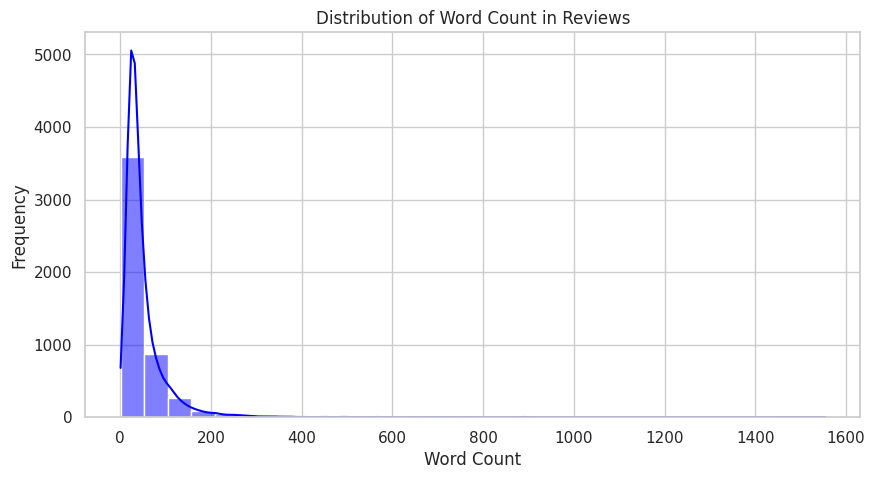

In [ ]:
df['word_count'] = df['reviewText'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Word Count in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


Top N Words per Sentiment Class
Description: A horizontal bar plot for the most common words used in reviews for each sentiment category.

In [ ]:
def plot_top_n_words_per_sentiment(df, sentiment_label, n=10):
    words = ' '.join(df[df['sentiment'] == sentiment_label]['reviewText'])
    words = re.sub(r'[^\w\s]', '', words.lower()).split()
    word_counts = Counter(words).most_common(n)

    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Top {n} Words in {sentiment_label} Sentiment')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()



<ipython-input-107-3be813625fc9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

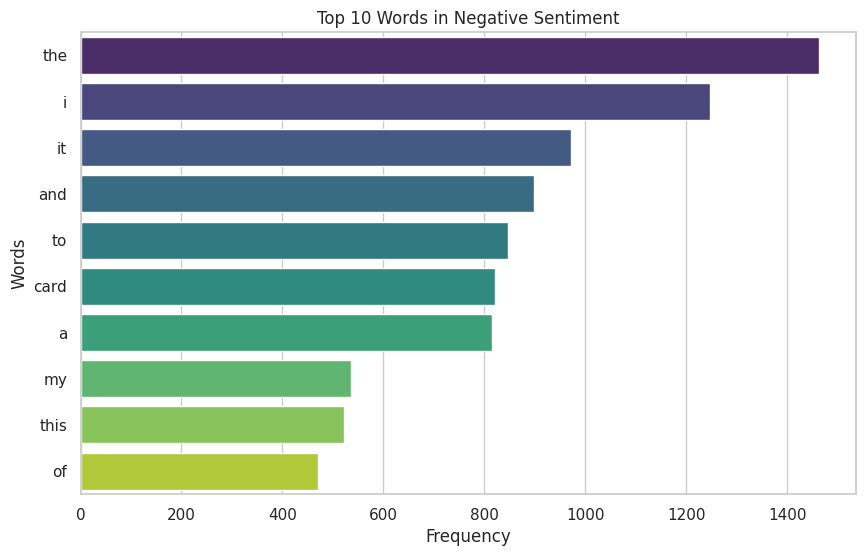

In [ ]:
# Plotting for each sentiment separately
# For Negative Sentiment
plot_top_n_words_per_sentiment(df, 'Negative', n=10)

<ipython-input-107-3be813625fc9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

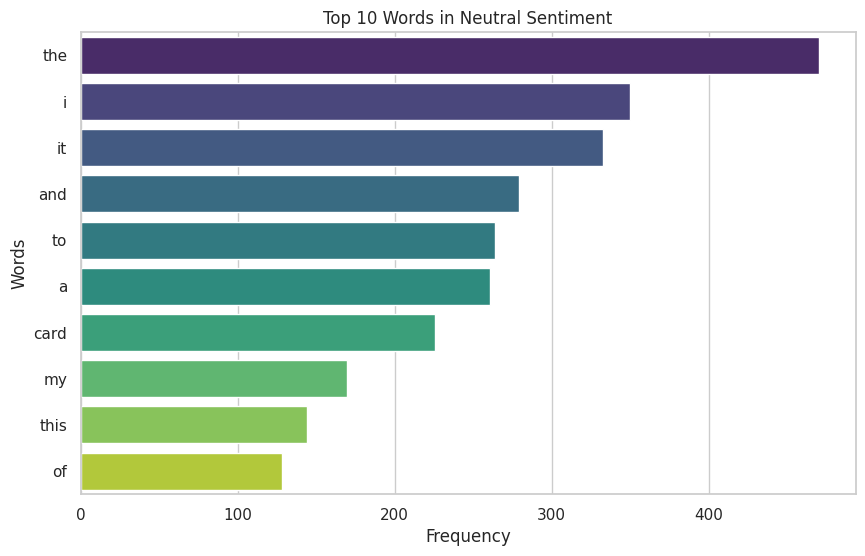

In [ ]:
# For Neutral Sentiment
plot_top_n_words_per_sentiment(df, 'Neutral', n=10)

<ipython-input-107-3be813625fc9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

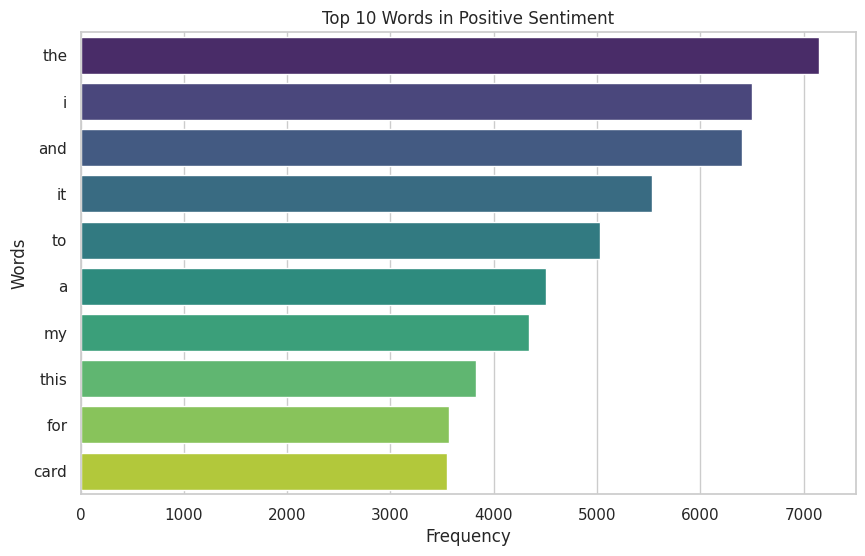

In [ ]:
# For Positive Sentiment
plot_top_n_words_per_sentiment(df, 'Positive', n=10)

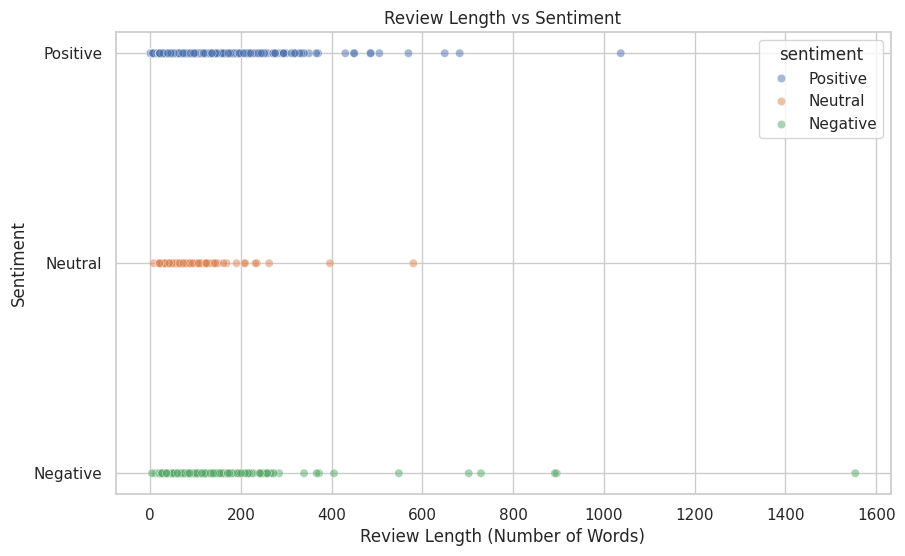

In [ ]:
df['review_length'] = df['reviewText'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='review_length', y='sentiment', hue='sentiment', alpha=0.5)
plt.title('Review Length vs Sentiment')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Sentiment')
plt.show()


In [ ]:
print(df.columns)

Index(['Sno', 'overall', 'reviewText', 'reviewTime', 'day_diff', 'helpful_yes',
       'helpful_no', 'total_vote', 'score_pos_neg_diff',
       'score_average_rating', 'wilson_lower_bound', 'cleaned_review',
       'tokenized_review', 'review_no_stopwords', 'lemmatized_review',
       'sentiment', 'cleaned_review_text', 'word_count'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


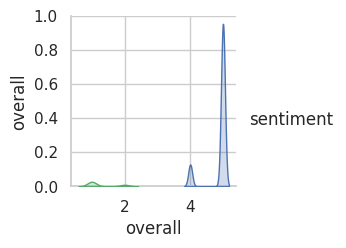

In [ ]:
# Pair plot for selected numerical columns
sns.pairplot(df[['overall', 'sentiment']], hue='sentiment')
plt.show()


0ct 1st
Text preprocessing..


In [ ]:
print(df.columns)

Index(['Sno', 'overall', 'reviewText', 'reviewTime', 'day_diff', 'helpful_yes',
       'helpful_no', 'total_vote', 'score_pos_neg_diff',
       'score_average_rating', 'wilson_lower_bound', 'cleaned_review',
       'tokenized_review', 'review_no_stopwords', 'lemmatized_review',
       'sentiment'],
      dtype='object')


In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Example preprocess function with handling for missing or non-string values
def preprocess_text(text):
    # Check if the text is a string, if not return an empty string
    if not isinstance(text, str):
        return ''

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply preprocessing to the review text column
df['cleaned_review_text'] = df['reviewText'].apply(preprocess_text)

# Check the cleaned text
print(df[['reviewText', 'cleaned_review_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          reviewText  \
1  Purchased this for my device, it worked as adv...   
2  it works as expected. I should have sprung for...   
3  This think has worked out great.Had a diff. br...   
4  Bought it with Retail Packaging, arrived legit...   
5  It's mini storage.  It doesn't do anything els...   

                                 cleaned_review_text  
1  purchased device worked advertised never much ...  
2  works expected sprung higher capacity think ma...  
3  think worked great diff bran gb card went sout...  
4  bought retail packaging arrived legit orange e...  
5  mini storage anything else supposed purchased ...  


Text Vectorization (Unstructured to Structured)
You can use TF-IDF (Term Frequency-Inverse Document Frequency) or CountVectorizer to convert the preprocessed text data into a structured format (numerical vectors).

Here we use TF-IDF:



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Transform the cleaned text into structured data
X = tfidf.fit_transform(df['cleaned_review_text'])

# Convert the result into a DataFrame for easier understanding
X_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# Check the structured data
print(X_df.head())


   ability  able  absolutely  accept  access  action  actual  actually  \
0      0.0   0.0         0.0     0.0     0.0     0.0     0.0       0.0   
1      0.0   0.0         0.0     0.0     0.0     0.0     0.0       0.0   
2      0.0   0.0         0.0     0.0     0.0     0.0     0.0       0.0   
3      0.0   0.0         0.0     0.0     0.0     0.0     0.0       0.0   
4      0.0   0.0         0.0     0.0     0.0     0.0     0.0       0.0   

   adapter  adapters  ...  writes  writing  written  wrong   xc  year  years  \
0      0.0       0.0  ...     0.0      0.0      0.0    0.0  0.0   0.0    0.0   
1      0.0       0.0  ...     0.0      0.0      0.0    0.0  0.0   0.0    0.0   
2      0.0       0.0  ...     0.0      0.0      0.0    0.0  0.0   0.0    0.0   
3      0.0       0.0  ...     0.0      0.0      0.0    0.0  0.0   0.0    0.0   
4      0.0       0.0  ...     0.0      0.0      0.0    0.0  0.0   0.0    0.0   

   yes  yet      zero  
0  0.0  0.0  0.000000  
1  0.0  0.0  0.000000  
2 

Sentiment Analysis
For sentiment analysis, you'll need labeled data (with sentiment tags like "positive", "negative", "neutral"). Here’s how to use the cleaned text and a basic classifier like Logistic Regression to classify the sentiment.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming your dataset has a 'sentiment' column with labels (0: negative, 1: positive, etc.)

y = df['sentiment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:



# Initialize the classifier (Logistic Regression)
clf = LogisticRegression()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9287894201424212

Classification Report:
               precision    recall  f1-score   support

    Negative       0.93      0.37      0.53        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.93      1.00      0.96       890

    accuracy                           0.93       983
   macro avg       0.62      0.46      0.50       983
weighted avg       0.91      0.93      0.91       983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.9287 (around 93%) is the overall accuracy, which means that 93% of the predictions made by our model are correct.

** Class-wise Performance:**
The classification report shows the performance metrics for each class (Negative, Neutral, Positive):

# a. Negative Class:
Precision: 0.93
This means that when the model predicts "Negative," 93% of the time, it is correct.
Recall: 0.37
This means that out of all actual "Negative" instances, the model only correctly identifies 37%.
F1-Score: 0.53
The F1-Score is the harmonic mean of precision and recall, indicating that while the model is good at predicting "Negative" when it does, it struggles to recall them correctly, leading to a low F1-Score.
# b. Neutral Class:
Precision: 0.00
This means the model never correctly predicted a "Neutral" instance. Either it doesn't predict this class or misclassifies it.
Recall: 0.00
Out of all the actual "Neutral" instances, the model failed to correctly identify any of them.
F1-Score: 0.00
Since both precision and recall are 0, the F1-score is also 0, indicating the model completely failed to identify "Neutral" reviews.
# c. Positive Class:
Precision: 0.93
When the model predicts "Positive," it is 93% accurate.
Recall: 1.00
The model identified all actual "Positive" instances perfectly.
F1-Score: 0.96
This high F1-score shows that the model performs exceptionally well at identifying positive reviews.

**Macro Avg vs. Weighted Avg:**
# Macro Avg:
The macro average is simply the unweighted mean of precision, recall, and F1-score across all classes. Since the model performed poorly for "Neutral" and "Negative," these scores are much lower (precision: 0.62, recall: 0.46, F1: 0.50).
# Weighted Avg:
The weighted average takes class imbalance into account, giving more weight to the "Positive" class (since it dominates the dataset). Thus, the weighted averages (precision: 0.91, recall: 0.93, F1: 0.91) are higher, closer to the overall accuracy.

In [ ]:
import numpy as np  # Import numpy for handling arrays
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Step 1: Encode sentiment labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
# Step 2: Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Step 3: Adjust class weights to give more importance to minority classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [ ]:
# Step 4: Use XGBoost (better suited for imbalanced data)
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, scale_pos_weight=class_weights_dict)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the XGBoost model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300],          # Number of trees
    'max_depth': [3, 5, 7, 9],                # Depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],        # Learning rate
    'subsample': [0.6, 0.8, 1],               # Subsample ratio of training data
    'colsample_bytree': [0.6, 0.8, 1],        # Subsample ratio of columns when constructing each tree
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=10,  # Number of random parameter combinations to try
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores for computation
    random_state=42
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Output the best parameters found by RandomizedSearchCV
print(f"Best parameters: {random_search.best_params_}")

# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:57:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Accuracy: 0.9257375381485249
Classification Report:
              precision    recall  f1-score   support

    Negative       0.69      0.48      0.56        65
     Neutral       0.00      0.00      0.00        28
    Positive       0.94      0.99      0.96       890

    accuracy                           0.93       983
   macro avg       0.54      0.49      0.51       983
weighted avg       0.89      0.93      0.91       983

